# Imports

In [12]:
import deap as dp
import time
import math
import nbody as nb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
%matplotlib notebook

# Setting up the RK4 Butcher Tableau

In [2]:
bt = [[   0.,   0.,   0.,   0.,   0.],
      [ 1/2., 1/2.,   0.,   0.,   0.],
      [ 1/2.,   0., 1/2.,   0.,   0.],
      [   1.,   0.,   0.,   1.,   0.],
      [   0., 1/6., 1/3., 1/3., 1/6.]]

# Implementation

### Setting up bodies

In [3]:
sun = nb.Body(mass=1.988e30,
           position=[0, 0, 0],
           velocity=[0, 0, 0],
           name='sun',
          )

earth = nb.Body(mass=5.972e28,
           position=[149597870700, 0, 0],
           velocity=[0, 29.8e3, 0],
           name='earth',
          )
bodies = [sun, earth]

### Setting up the system, the time interval of integration, and the integrators

In [17]:
the_system = nb.System(bodies)
t_init = 0.
t_fin = 365.25*24*3600
steps = 10000
t_interval = np.linspace(t_init, t_fin, steps)

the_system.setup_integrators(bt, t_init, t_fin, steps)

### Run

In [18]:
start = time.process_time()

the_system.run()

end = time.process_time()
elapsed = end - start

print(elapsed)

1.4328839999999978


In [8]:
#print(the_system.data['vx'][1][:5])
#print(the_system.data['vy'][1][:5])
#print(the_system.data['vz'][1][:5])
#print(the_system.data ['x'][1][:5])
#print(the_system.data ['y'][1][:5])
#print(the_system.data ['z'][1][:5])
#print(the_system.data['ac'][1][-5:])

# Plotting

### Orbits

<IPython.core.display.Javascript object>


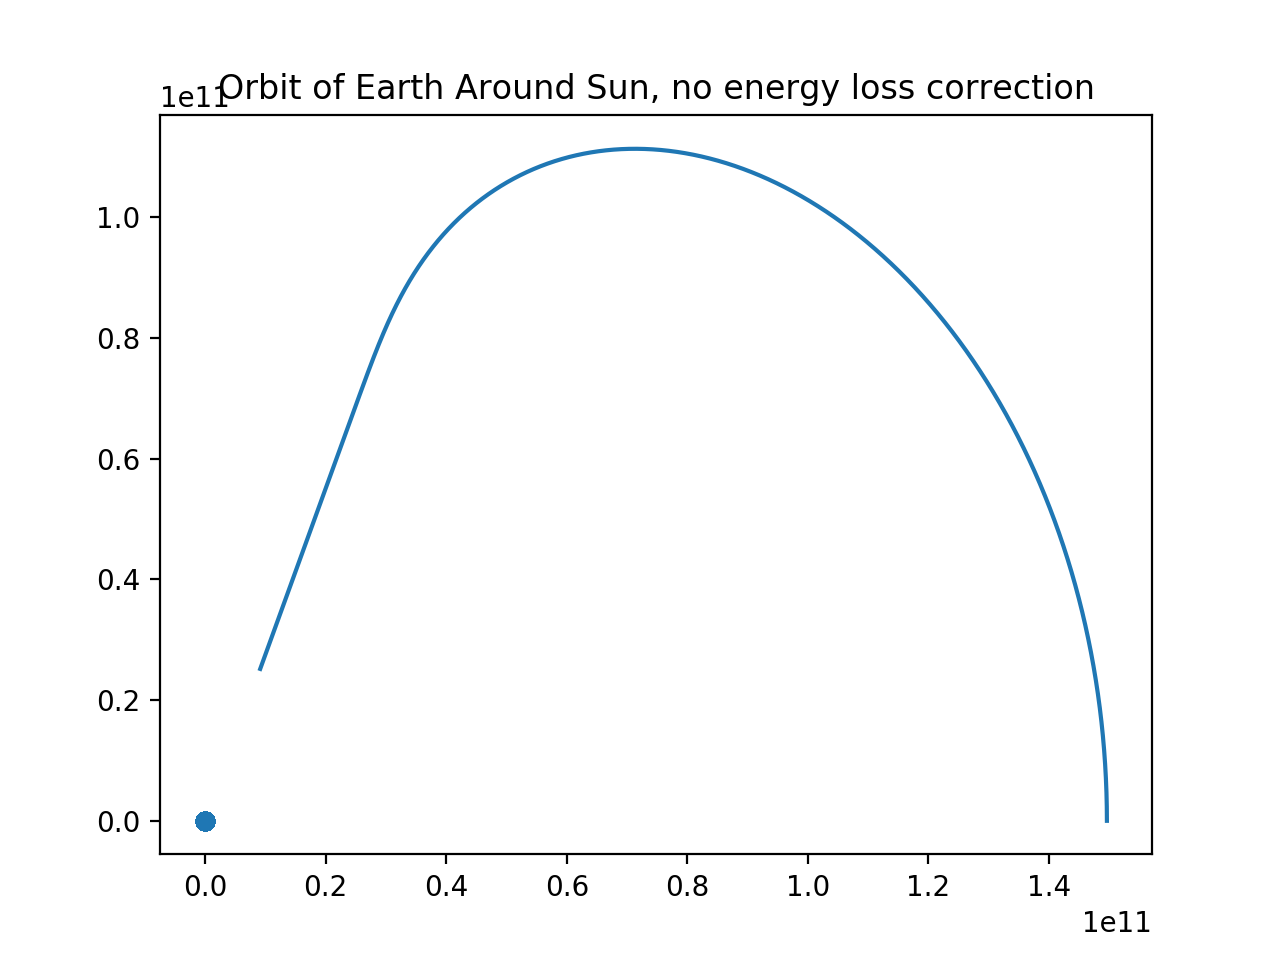

In [25]:
which = 1
fig = plt.figure()
ax1 = fig.add_subplot(111)
#print(len(bodies))
ax1.scatter(the_system.data['x'][0], the_system.data['y'][0])
for i in range(1, len(bodies)):
    ax1.plot(the_system.data['x'][i], the_system.data['y'][i])

plt.title('Orbit of Earth Around Sun, no energy loss correction')
plt.savefig("decaying_orbits.png", dpi=300)
plt.show()

### Change in energy

In [10]:
E = the_system.energy
dE = [((e - E[0])/abs(E[0]))*100 for e in E]

<IPython.core.display.Javascript object>


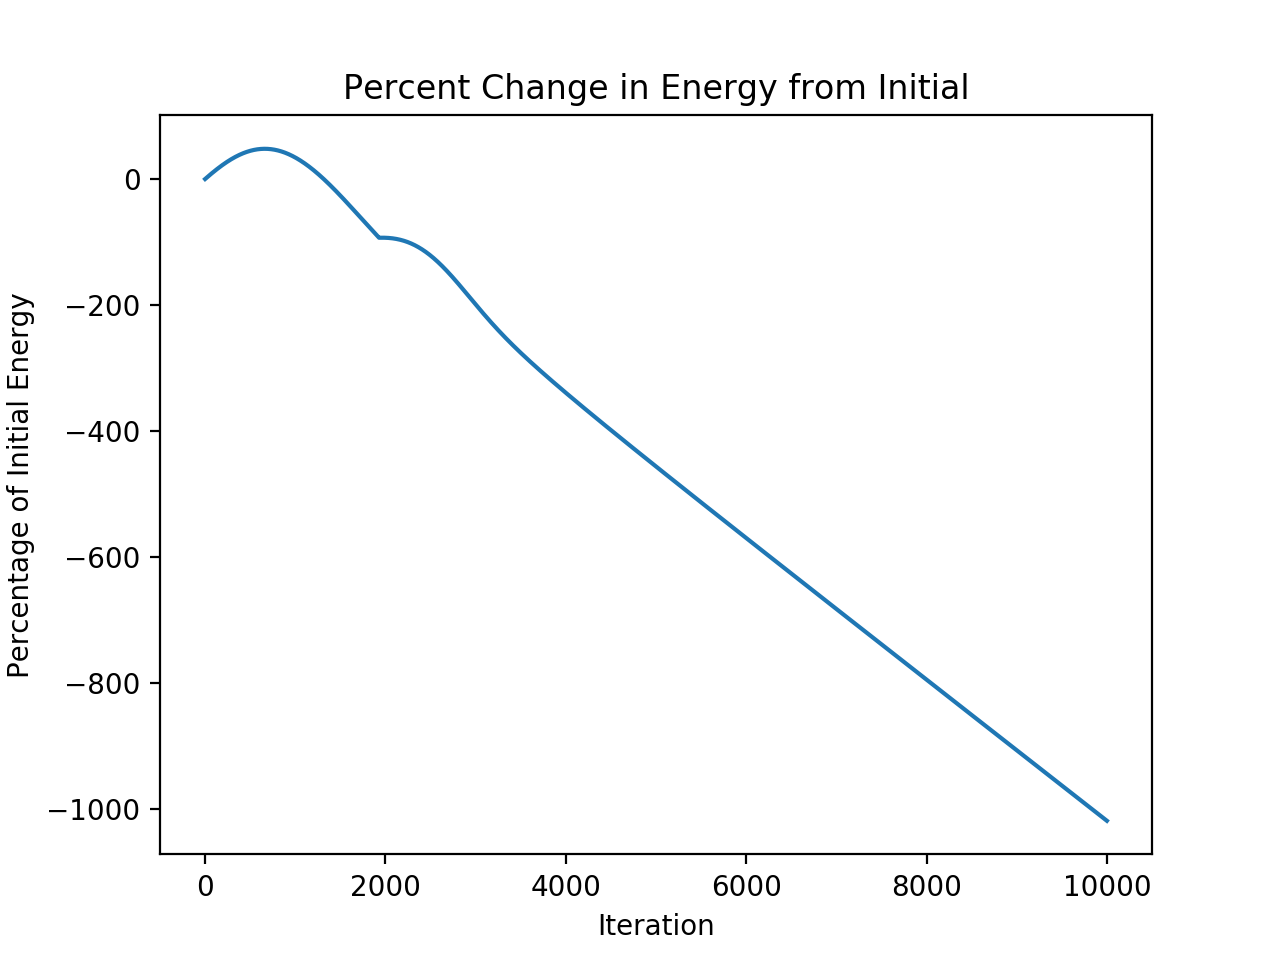

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dE)
plt.title('Percent Change in Energy from Initial')
plt.ylabel('Percentage of Initial Energy')
plt.xlabel('Iteration')
plt.show()